<a href="https://colab.research.google.com/github/ua-datalab/Bioinformatics/blob/main/Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leveraging MLflow for Experiment Tracking in Bioinformatics


In [1]:
!pip install mlflow pandas scikit-learn numpy

In [2]:
import mlflow
import mlflow.sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [3]:
# Load dataset
data = pd.read_csv('pima-indian-diabetes.csv')

# Display first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


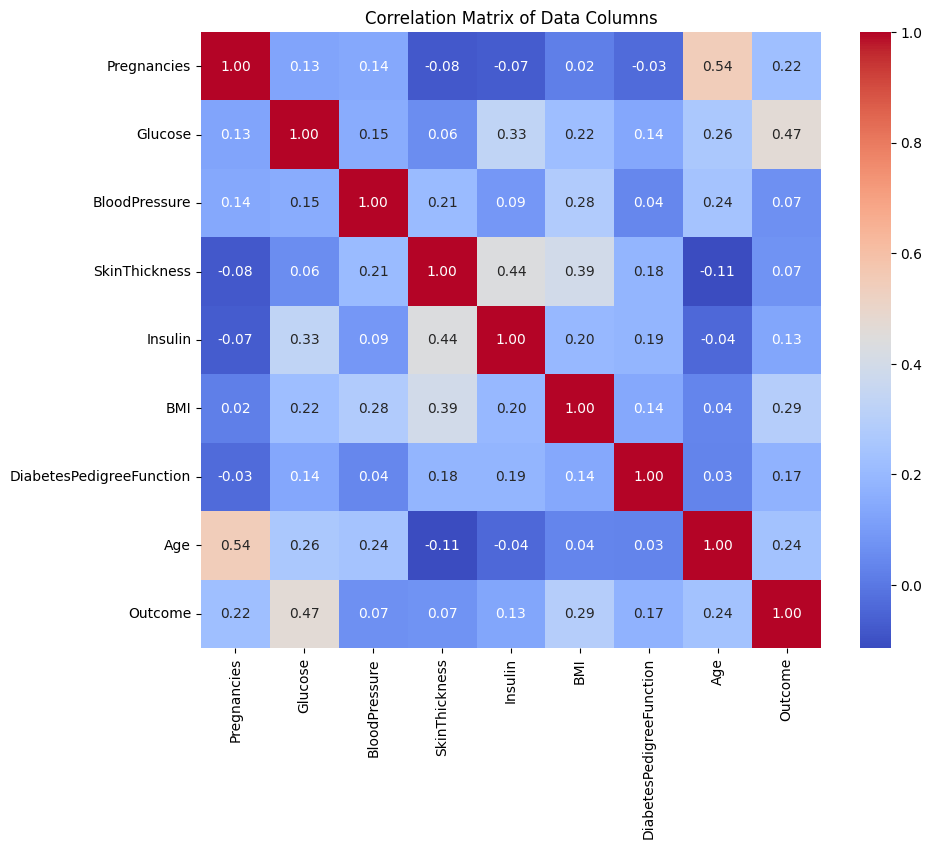

In [4]:
# prompt: Using dataframe data: calcualte the correlations between different columns and plot the values

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Data Columns')
plt.show()


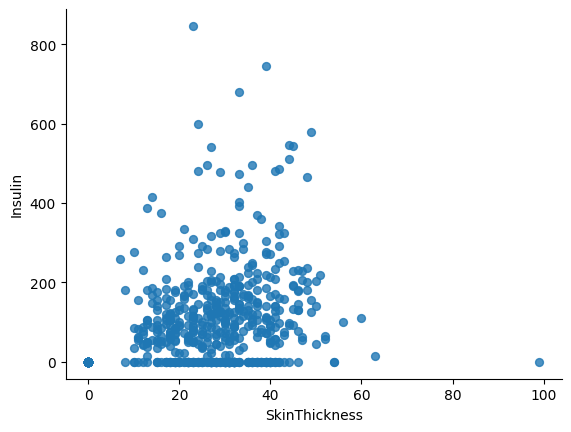

In [5]:
# @title SkinThickness vs Insulin

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

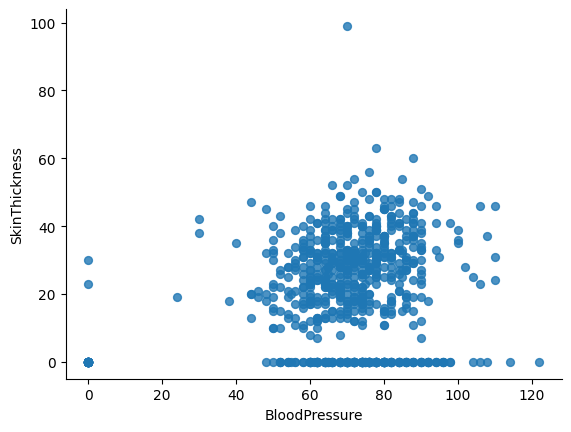

In [6]:
# @title BloodPressure vs SkinThickness

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## 3. Data Preprocessing


In [7]:
# Check for missing values
data.isnull().sum()

# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

## 4. Split Data into Training and Testing Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Set Up MLflow Experiment

In [9]:
mlflow.set_experiment("Bioinformatics_Diabetes_Prediction")

2024/10/24 01:51:21 INFO mlflow.tracking.fluent: Experiment with name 'Bioinformatics_Diabetes_Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///workspaces/Bioinformatics/MLFlow/mlruns/316360879138622885', creation_time=1729734681767, experiment_id='316360879138622885', last_update_time=1729734681767, lifecycle_stage='active', name='Bioinformatics_Diabetes_Prediction', tags={}>

## 6. Define and Run Experiments

In [10]:
n_estimators_list = [50, 100, 150]
max_depth_list = [5, 10, 15]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        with mlflow.start_run():
            # Model training
            rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
            rf.fit(X_train, y_train)

            # Predictions
            y_pred = rf.predict(X_test)
            y_proba = rf.predict_proba(X_test)[:, 1]
            auc_score = roc_auc_score(y_test, y_proba)

            # Log parameters and metrics
            mlflow.log_param("n_estimators", n_estimators)
            mlflow.log_param("max_depth", max_depth)
            mlflow.log_metric("roc_auc", auc_score)

            # Log model
            mlflow.sklearn.log_model(rf, "random_forest_model")

            print(f"Run with n_estimators={n_estimators}, max_depth={max_depth}, AUC={auc_score:.4f}")

2024/10/24 01:51:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=50, max_depth=5, AUC=0.8296


2024/10/24 01:51:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=50, max_depth=10, AUC=0.8219


2024/10/24 01:51:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=50, max_depth=15, AUC=0.7989


2024/10/24 01:51:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=100, max_depth=5, AUC=0.8347


2024/10/24 01:51:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=100, max_depth=10, AUC=0.8266


2024/10/24 01:51:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=100, max_depth=15, AUC=0.8084


2024/10/24 01:51:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=150, max_depth=5, AUC=0.8338


2024/10/24 01:51:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=150, max_depth=10, AUC=0.8281


2024/10/24 01:51:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run with n_estimators=150, max_depth=15, AUC=0.8178


## 7. Viewing Experiment Results

In [11]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiment = client.get_experiment_by_name("Bioinformatics_Diabetes_Prediction")
runs = client.search_runs(experiment_ids=experiment.experiment_id)

# Create a DataFrame of runs
runs_df = pd.DataFrame([
    {
        'run_id': run.info.run_id,
        'n_estimators': int(run.data.params['n_estimators']),
        'max_depth': int(run.data.params['max_depth']),
        'roc_auc': float(run.data.metrics['roc_auc']),
    } for run in runs
])

# Display the runs sorted by AUC score
runs_df.sort_values(by='roc_auc', ascending=False, inplace=True)
runs_df.reset_index(drop=True, inplace=True)
runs_df

,run_id,n_estimators,max_depth,roc_auc
0,1cc2c97a3bf845af966e35fedb56f83f,100,5,0.834711
1,c36c52ff7d194cd1a3396dd662cf6f40,150,5,0.833792
2,19e055544fb1497fbb1756d6914705a2,50,5,0.829568
3,85353c51158b445d85667c127a1abcb7,150,10,0.828099
4,d95b3ddbccb84d6388ff52e2799f14ff,100,10,0.826630
5,e99d013a57fa40f7aceb8475bc2b8419,50,10,0.821855
6,e0a92912d55642269d8b7864fe161284,150,15,0.817815
7,892f97bab56e4bf384a90b5d33a38692,100,15,0.808448
8,fa141ffde66146a0a9efbbd672c7387d,50,15,0.798898


## 8. Visualize Performance

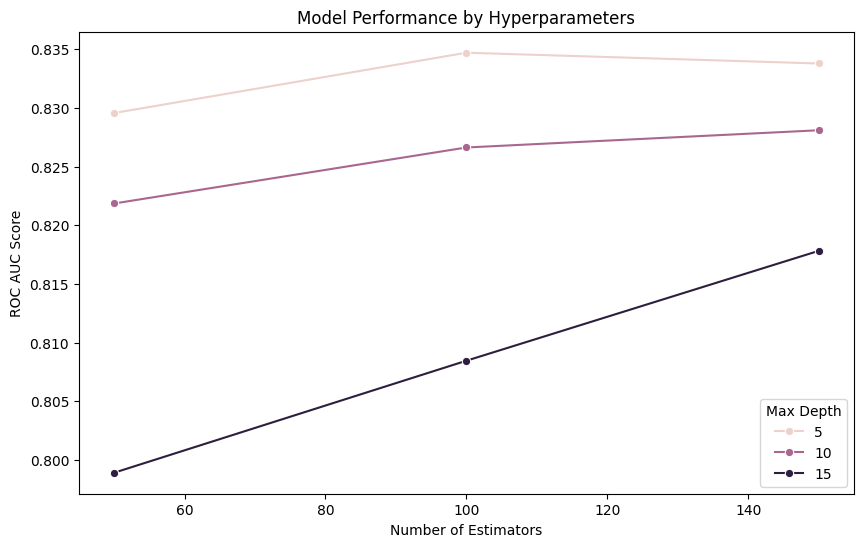

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=runs_df, x='n_estimators', y='roc_auc', hue='max_depth', marker='o')
plt.title('Model Performance by Hyperparameters')
plt.xlabel('Number of Estimators')
plt.ylabel('ROC AUC Score')
plt.legend(title='Max Depth')
plt.show()

## 9. Load the Best Model

In [13]:
# Get the best run
best_run_id = runs_df.iloc[0]['run_id']

# Load the model from the best run
best_model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/random_forest_model")

# Evaluate the model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

